<a href="https://colab.research.google.com/github/quintessence18/LicensePlateDetection-/blob/master/License_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **License-Plate Detection**


#### You will need to install the below dependencies for this to work

pip install numpy --user

pip install pandas --user


## **Installing open cv**
Link: https://docs.opencv.org/master/d5/de5/tutorial_py_setup_in_windows.html

installing Darkflow
Run these commands in order:

1. pip install Cython
2. git clone https://github.com/thtrieu/darkflow.git
3. cd darkflow
4. python3 setup.py build_ext --inplace
5. pip install .


You may run into the issue Microsoft Visual C++ 14.0 is required. Get it with "Microsoft Visual C++ Build Tools": https://visualstudio.microsoft.com/downloads/

Ensure that Visual Studio is downloaded with the C++ package
This is done when initially setting up Visual Studio so if you don't have it, would will need to uninstall and reinstall Visual Studio!





### Get the repos!
You will need the pb files from the drive link here :https://drive.google.com/drive/u/1/folders/17gxw7tv7jy3KgJFhQiHX0IilYObFbIJp

As for the meta files and everything else, that will be provided in the LicensePlateRecognition repo

As stated in the original repo here: https://github.com/TheophileBuy/LicensePlateRecognition

You will need to:

1. Move yolo.cfg / yolo-character.cfg / yolo-plate.cfg to ./darkflow/cfg/


2. Move yolo.weights to ./darkflow/bin/


3. Move train-character.py / train-plate.py to ./darkflow/

4. Change labels in ./darkflow/labels.txt

The cell after ensures darkflow has a clean installation with all the appropriate files etc.

In [ ]:
!git clone https://github.com/TheophileBuy/LicensePlateRecognition.git

Cloning into 'LicensePlateRecognition'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 48 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [ ]:
# Clean up the directory
%cd /content/
%rm -rf darkflow
# Clone the darkflow repository
!git clone https://github.com/thtrieu/darkflow
# Change into the darkflow dir and install darkflow with pip
%cd darkflow
!python setup.py build_ext --inplace
!pip install -e .

/content
Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2713
Receiving objects: 100% (2713/2713), 32.98 MiB | 2.20 MiB/s, done.
Resolving deltas: 100% (1762/1762), done.
/content/darkflow
Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cytho

### Reinstall
Uninstall all forms of tensorflow first!

Darkflow only works with tensorflow version 1.14 therefore you need to uninstall the current verions and reinstall that specific version!

In [ ]:
# Darkflow only works with tensorflow 1.14 - I'm installing both as some packages are depreciated
!pip uninstall tensorflow
!pip uninstall tensorflow-gpu
!pip install tensorflow-gpu==1.14
!pip install keras==2.2.5

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 377.0MB 47kB/s 
     |████████████████████████████████| 491kB 41.5MB/s 
     |████████████████████████████████| 3.2MB 39.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
     |████

#### Import your packages

Do be warned darkflow tends to be dodgy and sometimes works - I feel it's unreliable at times therefore you may be interested in trying out darknet - since darkflow TFNet is using a modified version of that 

link to darknet here: https://github.com/pjreddie/darknet

In [ ]:
import pandas
import numpy as np
import sys
from darkflow.net.build import TFNet
import cv2

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Train yolo model on images
I had problems with the weight files and pretrained cfg which is why I skipped to using the trained weights.

If it doesn't work for you too, then possibly try creating your own cfg and weights. 

I had a rough glimpse at a tutorial here: https://medium.com/analytics-vidhya/custom-object-detection-with-yolov3-8f72fe8ced79

In [ ]:
import os
os.chdir("/")
options = {"model": "/content/darkflow/cfg/yolo-plate.cfg", 
           "load": "/content/darkflow/bin/yolo.weights",
           "batch": 8,
           "epoch": 100,
           "gpu": 0.9,
           "train": True,
           "annotation": "/content/drive/My Drive/License_Plates/Licence Plate Recognition/Datasets/AnnotationsXML/001plate",
           "dataset": "/content/drive/My Drive/License_Plates/Licence Plate Recognition/Datasets/Images/001plate"}
tfnet = TFNet(options)
tfnet.train()
tfnet.savepb()

Parsing /content/darkflow/cfg/yolo-plate.cfg
Loading /content/darkflow/bin/yolo.weights ...


/content/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolo.cfg not found, use /content/darkflow/cfg/yolo-plate.cfg instead
  cfg_path, FLAGS.model))


AssertionError: ignored

## Use trained weights and Meta

Again TFNet can be very unpredictable, yoloPlate managed to work however we have some issues with yoloCharacter in the next segment which you will see further down

In [ ]:
import tensorflow as tf

In [ ]:
options = {"pbLoad": "/content/yolo-plate.pb", "metaLoad": "/content/yolo-plate.meta", "gpu": 0.9}
yoloPlate = TFNet(options)


Loading from .pb and .meta

GPU mode with 0.9 usage





In [ ]:
# This crops the image to the bounding boxes  only
def firstCrop(img, predictions):
    predictions.sort(key=lambda x: x.get('confidence'))
    xtop = predictions[-1].get('topleft').get('x')
    ytop = predictions[-1].get('topleft').get('y')
    xbottom = predictions[-1].get('bottomright').get('x')
    ybottom = predictions[-1].get('bottomright').get('y')
    firstCrop = img[ytop:ybottom, xtop:xbottom]
    cv2.rectangle(img,(xtop,ytop),(xbottom,ybottom),(0,255,0),3)
    return firstCrop

In [ ]:
# this function performs the same crop but checks using grey scale
def secondCrop(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,127,255,0)
    contours,_ = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    if(len(areas)!=0):
        max_index = np.argmax(areas)
        cnt=contours[max_index]
        x,y,w,h = cv2.boundingRect(cnt)
        bounds = cv2.boundingRect(cnt)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        secondCrop = img[y:y+h,x:x+w]
    else:
        secondCrop = img
    return secondCrop

In [ ]:
#set the image you want to check
frame = cv2.imread("/content/drive/My Drive/License_Plates/Licence Plate Recognition/Datasets/Images/001plate/m3_2.jpg")

In [ ]:
#run through the predictions
predictions = yoloPlate.return_predict(frame)
firstCropImg = firstCrop(frame, predictions)
secondCropImg = secondCrop(firstCropImg)

### progress output

In [ ]:
from google.colab.patches import cv2_imshow 

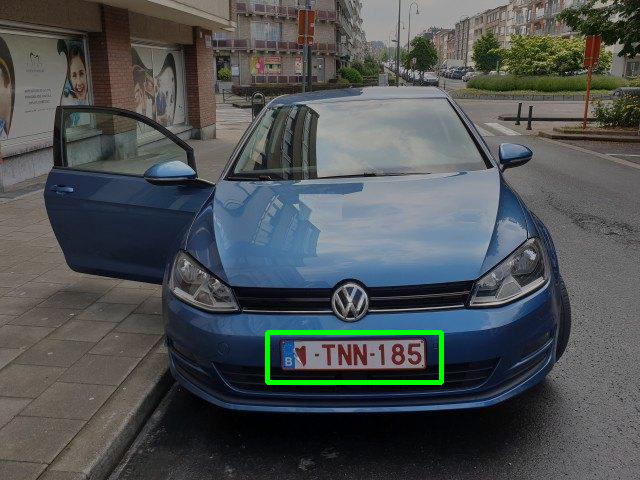

In [ ]:
cv2_imshow(frame)

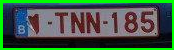

In [ ]:
cv2_imshow(firstCropImg)

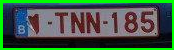

In [ ]:
cv2_imshow(secondCropImg)

## Character Recognition

Again it was not working initially but as you can see after a while it works

In [ ]:
options = {"pbLoad": "/content/yolo-character.pb", "metaLoad": "/content/yolo-character.meta", "gpu": 0.9}
yoloCharacter = TFNet(options)


Loading from .pb and .meta
GPU mode with 0.9 usage


In [ ]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
thresh_inv = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,39,1)
edges = auto_canny(thresh_inv)
ctrs, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
img_area = frame.shape[0]*frame.shape[1]
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    roi_area = w*h
    roi_ratio = roi_area/img_area
if((roi_ratio >= 0.015) and (roi_ratio < 0.09)):
        if ((h>1.2*w) and (3*w>=h)):
            cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)

In [ ]:
#run through the predictions
auto = auto_canny(frame)

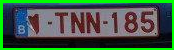

In [ ]:
cv2_imshow(secondCropImg)

In [ ]:
def opencvReadPlate(img):
    charList=[]
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh_inv = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,39,1)
    edges = auto_canny(thresh_inv)
    ctrs, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    img_area = img.shape[0]*img.shape[1]

    for i, ctr in enumerate(sorted_ctrs):
        x, y, w, h = cv2.boundingRect(ctr)
        roi_area = w*h
        non_max_sup = roi_area/img_area

        if((non_max_sup >= 0.015) and (non_max_sup < 0.09)):
            if ((h>1.2*w) and (3*w>=h)):
                char = img[y:y+h,x:x+w]
                charList.append(cnnCharRecognition(char))
                cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2_imshow(img)
    licensePlate="".join(charList)
    return licensePlate

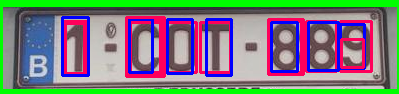

In [ ]:
o_cv = opencvReadPlate(secondCropImg)

# CNN training

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import layers, models
import glob
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [ ]:
import keras
from tensorflow.keras import layers, models

Using TensorFlow backend.


In [ ]:
width = 75
height = 100
channel = 1


In [ ]:
def load_data():
        images = np.array([]).reshape(0,height,width)
        labels = np.array([])
        
        ################ Data in  ./AUG then in a folder with label name, example : ./AUG/A for A images #############
        directories = [x[0] for x in os.walk('/content/drive/My Drive/License_Plates/Licence Plate Recognition/Datasets/Images')][1:][0]
        print("These are the directories:",directories)
        for directory in directories:
                filelist = glob.glob(directory+'/*.jpg')
                sub_images = np.array([np.array(Image.open(fname)) for fname in filelist])
                sub_labels = [int(directory[-2:])]*len(sub_images)
                images = np.append(images,sub_images, axis = 0)
                print(images)
                labels = np.append(labels,sub_labels, axis = 0)
        X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, shuffle=True)
        return (X_train, y_train), (X_test, y_test)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()
train_images = train_images.reshape((train_images.shape[0], height, width, channel))
test_images = test_images.reshape((test_images.shape[0], height, width,channel))
train_images, test_images = train_images / 255.0, test_images / 255.0

ValueError: ignored

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channel)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(35, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=8)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
model.save("model_char_recognition.h5")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 73, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 36, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 17, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 15, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 20160)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

NameError: ignored

Decided to stop since training would take time...


## Using the Model

In [ ]:
 characterRecognition = tf.keras.models.load_model('/content/character_recognition.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
def cnnCharRecognition(img):
    dictionary = {0:'0', 1:'1', 2 :'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A',
    11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K',
    21:'L', 22:'M', 23:'N', 24:'P', 25:'Q', 26:'R', 27:'S', 28:'T', 29:'U',
    30:'V', 31:'W', 32:'X', 33:'Y', 34:'Z'}

    blackAndWhiteChar=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blackAndWhiteChar = cv2.resize(blackAndWhiteChar,(75,100))
    image = blackAndWhiteChar.reshape((1, 100,75, 1))
    image = image / 255.0
    new_predictions = characterRecognition.predict(image)
    char = np.argmax(new_predictions)
    return dictionary[char]

In [ ]:
def yoloCharDetection(predictions,img):
    charList = []
    positions = []
    for i in predictions:
        if i.get("confidence")>0.10:
            xtop = i.get('topleft').get('x')
            positions.append(xtop)
            ytop = i.get('topleft').get('y')
            xbottom = i.get('bottomright').get('x')
            ybottom = i.get('bottomright').get('y')
            char = img[ytop:ybottom, xtop:xbottom]
            cv2.rectangle(img,(xtop,ytop),( xbottom, ybottom ),(255,0,0),2)
            charList.append(cnnCharRecognition(char))
    sortedList = [x for _,x in sorted(zip(positions,charList))]
    licensePlate="".join(sortedList)
    return licensePlate

In [ ]:
licensePlate = []
predictions = yoloCharacter.return_predict(secondCropImg)
licensePlate.append(yoloCharDetection(predictions,secondCropImg))

# Combined

This will return the image and the text

In [ ]:
while(cap.isOpened()):
    ret, frame = cap.read()
    h, w, l = frame.shape
    frame = imutils.rotate(frame, 270)


    if counter%6 == 0:
        licensePlate = []
        try:
            predictions = yoloPlate.return_predict(frame)
            firstCropImg = firstCrop(frame, predictions)
            secondCropImg = secondCrop(firstCropImg)
            cv2.imshow('Second crop plate',secondCropImg)
            secondCropImgCopy = secondCropImg.copy()
            licensePlate.append(opencvReadPlate(secondCropImg))
            print("OpenCV+CNN : " + licensePlate[0])
        except:
            pass
        try:
            predictions = yoloCharacter.return_predict(secondCropImg)
            licensePlate.append(yoloCharDetection(predictions,secondCropImgCopy))
            cv2.imshow('Second crop plate',secondCropImg)
            print("Yolo+CNN : " + licensePlate[1])
        except:
            pass	

    counter+=1
    cv2.imshow('Video',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: ignored

# Final

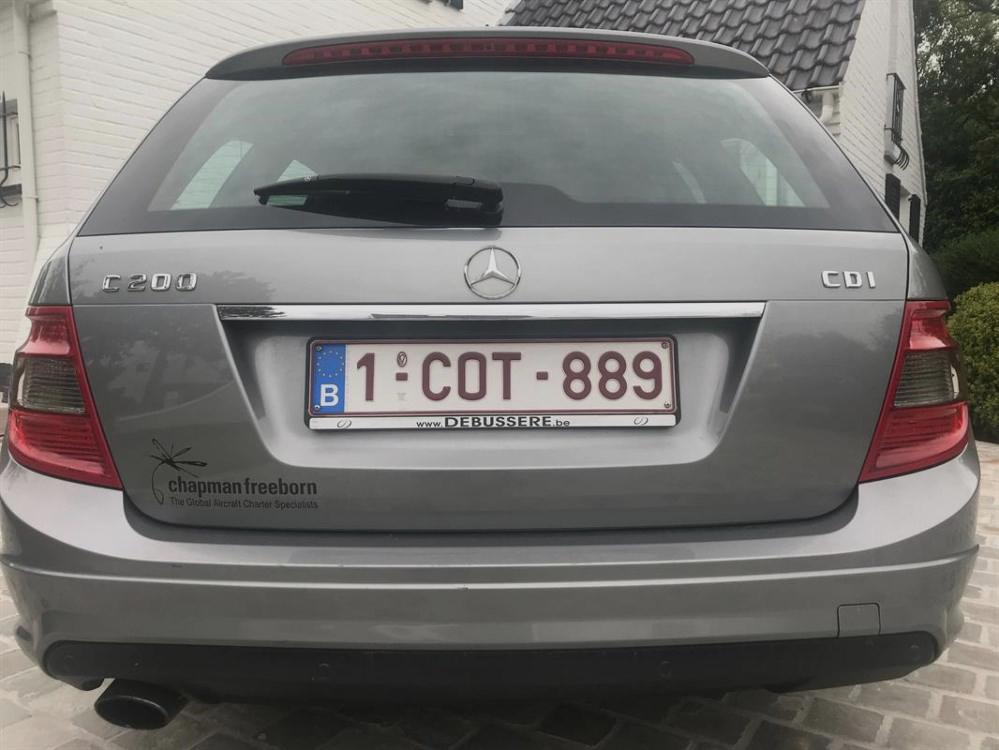

In [ ]:
frame = cv2.imread("/content/drive/My Drive/License_Plates/Licence Plate Recognition/Datasets/Images/001plate/m209_0.jpg")
cv2_imshow(frame)

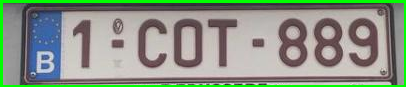

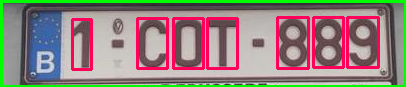

OpenCV+CNN : 1C0T889


In [ ]:
predictions = yoloPlate.return_predict(frame)
firstCropImg = firstCrop(frame, predictions)
secondCropImg = secondCrop(firstCropImg)
cv2_imshow(secondCropImg)
licensePlate.append(opencvReadPlate(secondCropImg))
print("OpenCV+CNN : " + licensePlate[1])

In [ ]:
predictions = yoloCharacter.return_predict(secondCropImg)
licensePlate.append(yoloCharDetection(predictions,secondCropImg))
print("Yolo+CNN : " + licensePlate[1])

Yolo+CNN : 1C0T889


## Conclusion

So far the image detection works, but the character recognition is terrible.
I'll start looking into other methods

Possible links:


1.   https://medium.com/@quangnhatnguyenle/detect-and-recognize-vehicles-license-plate-with-machine-learning-and-python-part-1-detection-795fda47e922

Furthermore there are problems when training models due to the sheer size of the character recognition dataset and creating weights. This project has used the pretrained weights and data.

The next step is to try find other methods to train the models and make them more accurate!

